### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Reading and Plotting image

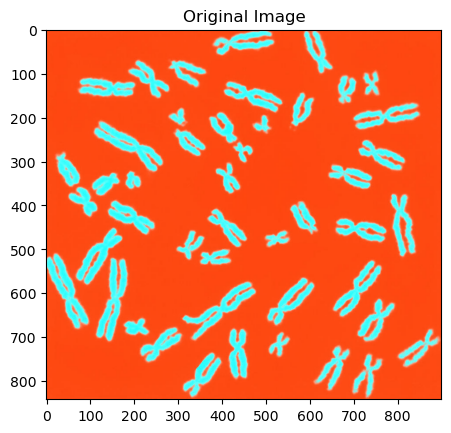

In [3]:
img = cv2.imread('chromosomes.jpg')
plt.title('Original Image')
plt.imshow(img)

### Converting the image from BGR(OpenCV format) to RGB

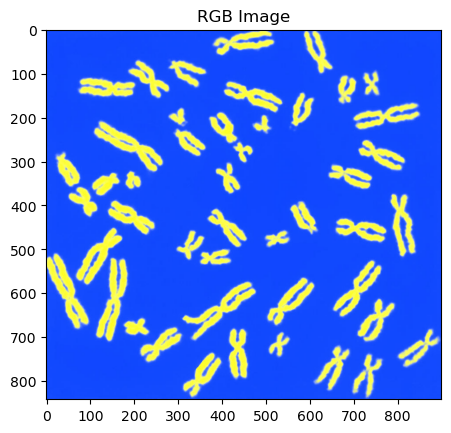

In [4]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title('RGB Image')
plt.imshow(rgb_img)

### Grayscaling the image

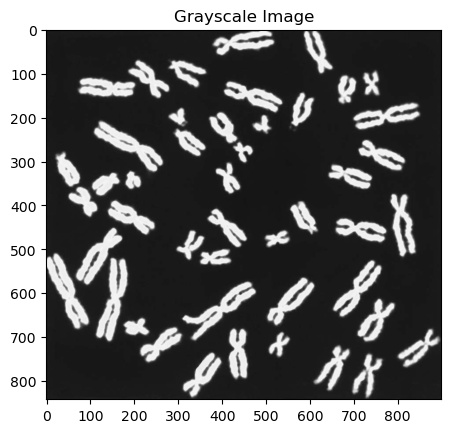

In [5]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.title("Grayscale Image")
plt.imshow(gray_img,cmap='gray')

### Morphological opening

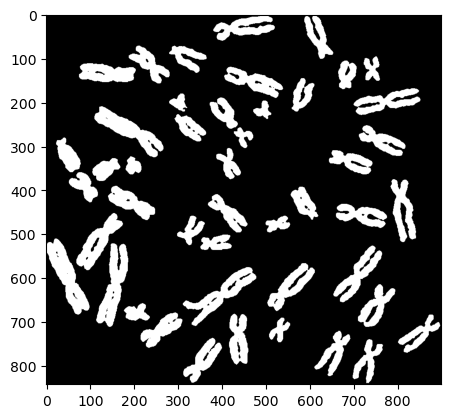

In [6]:
krnl = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
bgrm_img = cv2.morphologyEx(gray_img, cv2.MORPH_OPEN, krnl)
thresh_img = cv2.threshold(bgrm_img, 128, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh_img, cmap='gray')
contours = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

### Features and Bounding boxes

    Height  Width    Area   Perimeter  Circularity
0      100     69  2489.0  419.019333     0.178142
1      102     88  3493.0  386.132030     0.294399
2      103     82  2822.0  443.244728     0.180501
3       56     48  1163.5  216.066015     0.313187
4       87     96  2587.5  448.943213     0.161327
5      116     44  3675.5  370.977702     0.335607
6       81     95  3275.0  318.877197     0.404738
7       40     59  1439.0  188.651801     0.508099
8       97     85  3629.0  343.705624     0.386032
9      134    167  5924.5  549.854899     0.246244
10     109    108  4395.5  362.374670     0.420632
11     129    111  4254.0  606.523947     0.145315
12     190     73  6254.5  610.374671     0.210965
13     173     99  6332.5  468.031525     0.363274
14      35     71  1714.5  239.580734     0.375356
15      38     56  1169.5  182.267026     0.442378
16      67     63  1643.5  270.492421     0.282273
17     130    106  4997.0  387.102593     0.419051
18      55    116  3341.5  467.

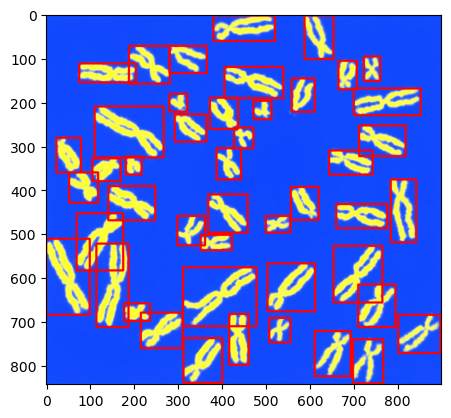

In [9]:
threshold = 5
if len(contours) >= threshold:
    features = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(rgb_img, (x, y), (x+w, y+h), (255, 0, 0), 4)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        circularity = (4*np.pi*area)/(perimeter**2) if perimeter > 0 else 0
        features.append({"Height": h, "Width": w, "Area": area, "Perimeter": perimeter, "Circularity": circularity})

    data=pd.DataFrame(features)
    print(data)

    plt.imshow(rgb_img, cmap='gray')
else:
    print("Insufficient contours detected. Exiting.")

### Standardization and Normalization of Data

In [38]:
# Standardization (z-scoring)
standardized_features = (data - data.mean()) / data.std()
print("Standardized Features:")
print(standardized_features)
print('\n')
# Normalization
normalized_features = (data - data.min()) / (data.max() - data.min())
print("Normalized Features:")
print(normalized_features)

Standardized Features:
      Height     Width      Area  Perimeter  Circularity
0   0.543284 -0.394473 -0.304530   0.572073    -1.241174
1   0.599953  0.168876  0.389957   0.333255    -0.447904
2   0.628288 -0.009024 -0.074187   0.747991    -1.225078
3  -0.703436 -1.017121 -1.221405  -0.901718    -0.319710
4   0.174935  0.406075 -0.236395   0.789372    -1.355910
5   0.996636 -1.135720  0.516196   0.223208    -0.166729
6   0.004928  0.376425  0.239162  -0.155132     0.304983
7  -1.156788 -0.690972 -1.030836  -1.100793     1.010259
8   0.458280  0.079926  0.484031   0.025166     0.177344
9   1.506658  2.511218  2.071875   1.522165    -0.776489
10  0.798295  0.761874  1.014235   0.160735     0.413434
11  1.364985  0.850823  0.916356   1.933680    -1.465165
12  3.093392 -0.275873  2.300143   1.961643    -1.017214
13  2.611705  0.495024  2.354097   0.927986     0.022059
14 -1.298461 -0.335173 -0.840267  -0.730961     0.104497
15 -1.213457 -0.779921 -1.217255  -1.147157     0.561817
16 -0.39

# REPORT                                  

### Q1: How can contour detection be used to identify objects in an image?

Ans. Contour detection is used to identify the objects by highlighting the boundaries of every object in the image. Contours detection serves the purpose of detecting boundaries and edges based on changes in pixel intensity. Therefore, any change in the pixel intensity leads to edge detection. There are many characterstics of an object like height, width, perimeter, area and circularity which can be identified through contour detection.

### Q2: What is the importance of standardization of data? What difference did you observe before and after standardization? 

Ans. Standardization or Z-scoring is used for feature scaling which in-turn ensures all features have comparable scale and ranges to efficiently train the ML model. Standardization is good for gaussian data and is more robus to outliers. It helps in transforming the data to have a mean of 0 and standard deviation of 1.
The difference that I observed before and after standardization is that the features like area, perimeter and circularity become more comparable reaching the same scale and biases got removed from varying scales.

### Q3: Let’s consider one of the values in the width column is missing. How to handle this missing value? 

Ans. If any of the values in the width column is missing, we can either go for regression or interpolation. It's not recommendable to fill the missing value with mean or average because if outliers are present, they will burst/ruin the data giving an inaccurate mean or average.  

### Q4: What is the importance of data normalization? What difference did you observe before and after normalization? 

Ans. Normalization is another technique for feature scaling which ensures all the features have comparable scale and ranges to efficiently train the ML model. Normalization makes the features scale between 0 and 1 and is good for non-gaussian data but is prone to outliers.
The difference that I observed before and after normalization is initially features like area has much higher values and circularity has fractional values but after normalization all the features boil down to range between 0 and 1 which is far more comparable. 

### Q5: How might you adapt the bounding box construction process to handle overlapping or touching chromosomes?

Ans. We can apply morphological operations like erosion, dilation, opening to separate out touching chromosomes: 
i) Erosion(cv2.erode())- This operation will separate slightly touching chromosomes.
ii) Dilation(cv2.dilate())- This opeation will restore the chromosomes size.
iii) Opening- This process is erosion followed by dilation which can be very effective.